### plotting directly with matplotlib

in some situations it may still be preferable or necessary

to prepare plots directly with matplotlib

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

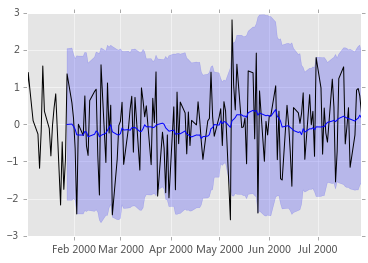

In [2]:
price = pd.Series(np.random.randn(150),
                  index=pd.date_range('2000-01-01', periods=150, freq='B'))
ma = pd.rolling_mean(price, 20)
mstd = pd.rolling_std(price, 20)
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, 
                 ma - 2 * mstd, 
                 ma + 2 * mstd, 
                 color='b', alpha=0.2)

### trellis plotting interface

the `rplot` trellis plotting interface is

`deprecated and will be removed in a future version`

how to convert your existing code to `seaborn`

[seaborn](http://stanford.edu/~mwaskom/software/seaborn/)

In [3]:
from pandas import read_csv
import pandas.tools.rplot as rplot

/Users/hqlgree2/anaconda/lib/python2.7/site-packages/pandas/tools/rplot.py:20: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.
  "packages.", FutureWarning)


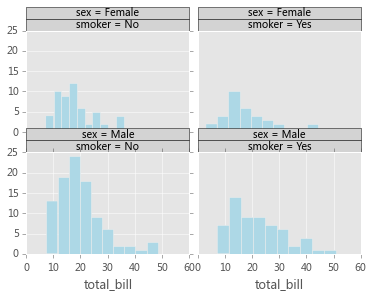

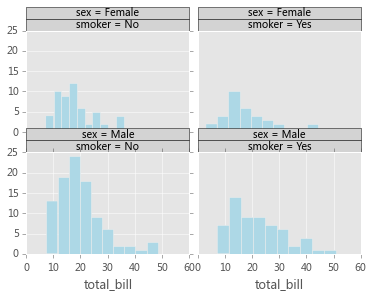

In [4]:
tips_data = read_csv('tips.csv')
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomHistogram())
plot.render(plt.gcf())

In [5]:
import seaborn as sns

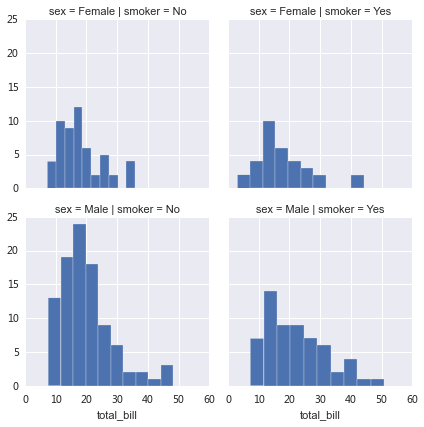

In [6]:
g = sns.FacetGrid(tips_data, row='sex', col='smoker')
g.map(plt.hist, 'total_bill')

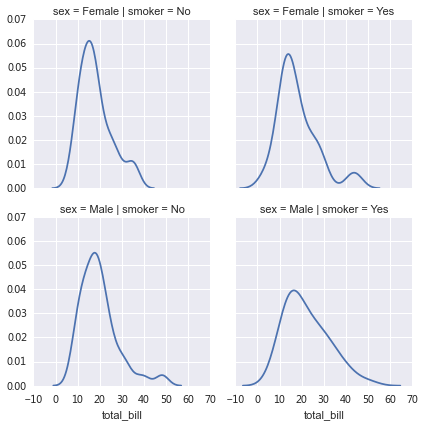

In [7]:
# plot kernel density estimation
g = sns.FacetGrid(tips_data, row='sex', col='smoker')
g.map(sns.kdeplot, 'total_bill')

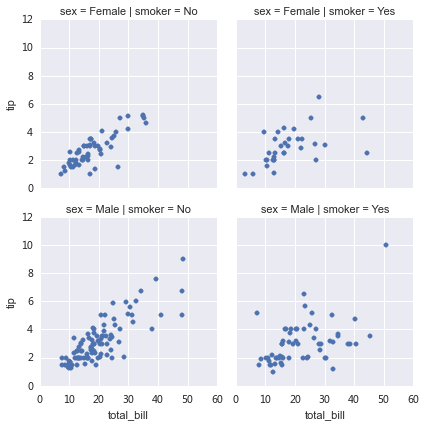

In [8]:
# two or more plots for the same data
# displayed on the some trellis grid cell
g = sns.FacetGrid(tips_data, row='sex', col='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

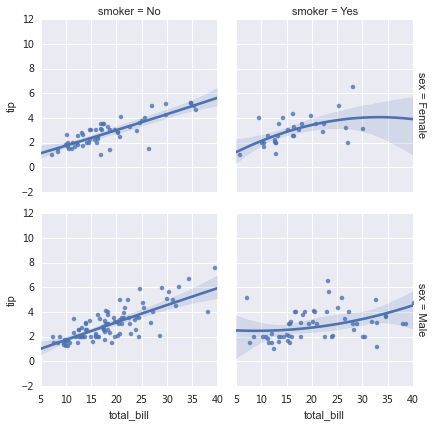

In [9]:
# with a regression line
# using `regplot` function
g = sns.FacetGrid(tips_data, row='sex', col='smoker', margin_titles=True)
g.map(sns.regplot, 'total_bill', 'tip', order=2)

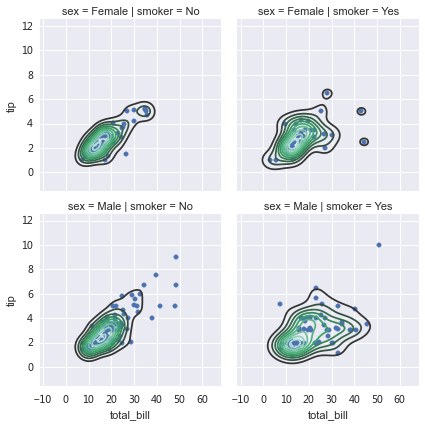

In [10]:
# 2d kernel density estimation plot
g = sns.FacetGrid(tips_data, row='sex', col='smoker')
g.map(plt.scatter, 'total_bill', 'tip')
g.map(sns.kdeplot, 'total_bill', 'tip')

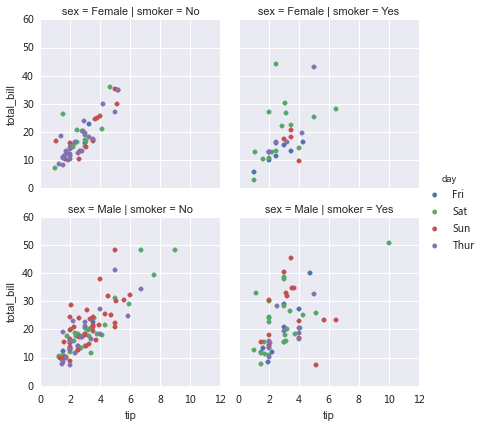

In [11]:
g = sns.FacetGrid(tips_data, row='sex', col='smoker', hue='day')
g.map(plt.scatter, 'tip', 'total_bill')
g.add_legend()